A notebook to generate a graph showing how close AlphaFold2 comes to the "closed" structure and the spread of the ColabFold structures around that.

So, we find the "closed" PDB structure with the smallest difference between it and the ALphaFold2 structure. Then we pull the ColabFold cluster structures for that PDB and display those on the graph.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots

plt.style.use('science')

pal = sns.color_palette('Set2')
print(pal.as_hex())

# Set the color palette. Our categories are "Single Domain", "Two-Domain", and "Autoinhibitory"
colors = {'Single Domain': pal[0], 'Two-Domain': pal[1], 'Autoinhibitory': pal[2], 'Full': pal[3], 'Clusters': pal[7], 'Two-State AI': pal[4]}
pal.as_hex()

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3']

In [2]:
'''
First we get the dataframes needed.
'''

# Dataframe with the classifications of the experimental structures
af = pd.read_csv('./project_pipeline/data/classified_files_3.tsv', sep='\t')

# Dataframe with the cluster scores
cl = pd.read_csv('./project_pipeline/data/two-state_cf_pdb_compared.tsv', sep='\t')

In [3]:
# Take a look at the dataframes
af.head()

,uniprot,pdb,region_1,region_2,complex_rmsd,percent_region_1,percent_region_2,2_aligned,2_comp,conformation,state,organism,date,notes
0,A0A0R4I961,6gtv,155-279,3-147,1.450,100.0,100.000000,1.673,1.135,Open,Active,Escherichia coli F18+,['2018-06-19'],NaN
1,A0A0R4I961,6gtz,155-279,3-147,1.631,100.0,100.000000,1.648,3.014,Open,Active,Escherichia coli F18+,['2018-06-19'],NaN
2,A0A0R4I961,6gu0,155-279,3-147,2.105,100.0,100.000000,1.788,4.298,Open,Active,Escherichia coli F18+,['2018-06-19'],NaN
3,B5XAZ0,7bfk,116-120,1-115,4.781,100.0,83.478261,2.600,0.965,Closed,Autoinhibited,Salmo salar,['2021-01-04'],NaN
4,B5XAZ0,7bfl,116-120,1-115,2.591,100.0,79.130435,2.760,0.807,Closed,Autoinhibited,Salmo salar,['2021-01-04'],NaN


In [4]:
cl.head()

,uniprot,pdb,cluster,region_1,region_2,complex_rmsd,1.0_aligned,1.0_comp,1.1_aligned,1.1_comp,...,2.2_aligned,2.2_comp,2.3_aligned,2.3_comp,1_aligned,1_comp,2_aligned,2_comp,state,conformation
0,O08967,2r09,U10-005,"251-265,383-395",77-206,17.274,0.0,0.0,5.393,41.776,...,0.0,0.0,0,0,3.704,36.530,1.183,33.607,Autoinhibited,Closed
1,O08967,2r09,031,"251-265,383-395",77-206,19.503,0.0,0.0,4.997,33.114,...,0.0,0.0,0,0,3.394,36.860,3.580,31.059,Autoinhibited,Closed
2,O08967,2r09,U10-001,"251-265,383-395",77-206,16.866,0.0,0.0,4.727,19.795,...,0.0,0.0,0,0,3.276,24.538,1.148,23.513,Autoinhibited,Closed
3,O08967,2r09,U100-004,"251-265,383-395",77-206,21.285,0.0,0.0,5.300,38.422,...,0.0,0.0,0,0,3.414,51.587,1.331,52.734,Autoinhibited,Closed
4,O08967,2r09,029,"251-265,383-395",77-206,12.546,0.0,0.0,4.883,21.756,...,0.0,0.0,0,0,3.296,22.383,4.080,23.212,Autoinhibited,Closed


In [5]:
# Proteins with two states can be taken from the cluster dataframe, as it only has those.
uniprots = cl['uniprot'].unique()

# Filter the classified dataframe to only those proteins with two states
two_state = af[af['uniprot'].isin(uniprots)]

# Find the Closed structure with the lowest 2_comp for every uniprot
closed = two_state[two_state['conformation'] == 'Closed']
lowest = closed.groupby('uniprot')['2_comp'].idxmin()

# Get the pdb ids of the lowest 2_comp for every uniprot
lowest_pdb = closed.loc[lowest]

In [6]:
# Now that we have the PDB IDs of the lowest 2_comp for every uniprot, we can get the cluster scores for those structures

# Filter the cluster dataframe using the PDB-uniprot pairs
pdb_uniprot = lowest_pdb[['uniprot', 'pdb']]

# Filter the cluster dataframe
merged = pd.merge(cl, pdb_uniprot, on=['uniprot', 'pdb'])
merged.head()

,uniprot,pdb,cluster,region_1,region_2,complex_rmsd,1.0_aligned,1.0_comp,1.1_aligned,1.1_comp,...,2.2_aligned,2.2_comp,2.3_aligned,2.3_comp,1_aligned,1_comp,2_aligned,2_comp,state,conformation
0,O08967,2r09,U10-005,"251-265,383-395",77-206,17.274,0.0,0.0,5.393,41.776,...,0.0,0.0,0,0,3.704,36.530,1.183,33.607,Autoinhibited,Closed
1,O08967,2r09,031,"251-265,383-395",77-206,19.503,0.0,0.0,4.997,33.114,...,0.0,0.0,0,0,3.394,36.860,3.580,31.059,Autoinhibited,Closed
2,O08967,2r09,U10-001,"251-265,383-395",77-206,16.866,0.0,0.0,4.727,19.795,...,0.0,0.0,0,0,3.276,24.538,1.148,23.513,Autoinhibited,Closed
3,O08967,2r09,U100-004,"251-265,383-395",77-206,21.285,0.0,0.0,5.300,38.422,...,0.0,0.0,0,0,3.414,51.587,1.331,52.734,Autoinhibited,Closed
4,O08967,2r09,029,"251-265,383-395",77-206,12.546,0.0,0.0,4.883,21.756,...,0.0,0.0,0,0,3.296,22.383,4.080,23.212,Autoinhibited,Closed


In [7]:
# Now we add a 'source' column to our two dataframes so we can concatenate them
# Have to harmonize the columns
lowest_pdb.head()
lowest_pdb_h = lowest_pdb[['uniprot', 'pdb', 'complex_rmsd', '2_comp', 'conformation', 'state']]
lowest_pdb_h['source'] = 'DeepMind'


merged_h = merged[['uniprot', 'pdb', 'complex_rmsd', '2_comp', 'conformation', 'state']]
merged_h['source'] = 'ColabFold'

# Create "U" designation if U in cluster
merged['Uniform'] = merged['cluster'].apply(lambda x: 'U' in x)

true = merged[merged['Uniform'] == True]
false = merged[merged['Uniform'] == False]

/tmp/ipykernel_1063628/1097632515.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowest_pdb_h['source'] = 'DeepMind'
/tmp/ipykernel_1063628/1097632515.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_h['source'] = 'ColabFold'


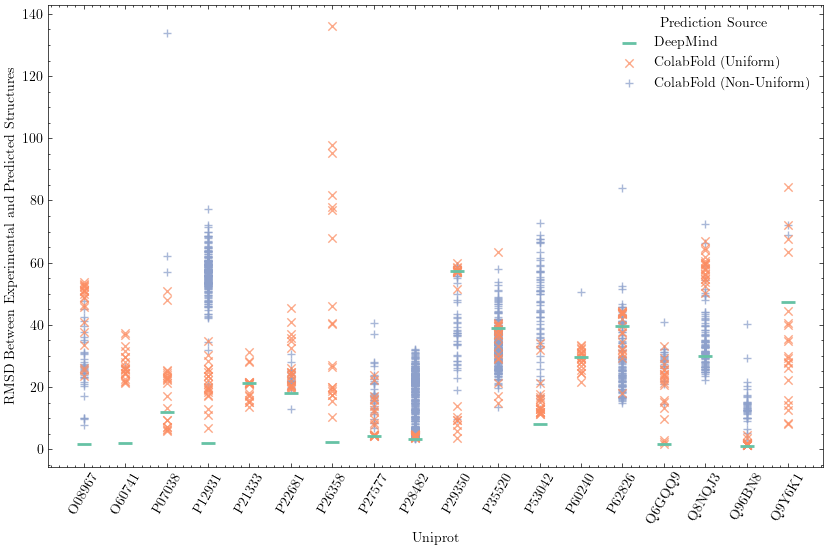

In [19]:
# Now we can graph them with the Uniprot as the x-axis and the 2_comp as the y-axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=lowest_pdb_h['uniprot'], y=lowest_pdb_h['2_comp'], color=pal[0], label='DeepMind', zorder=2, marker="_", s=100, linewidths=2)
ax.scatter(x=true['uniprot'], y=true['2_comp'], color=pal[1], label='ColabFold (Uniform)', zorder=1, alpha=0.75, marker='x')
ax.scatter(x=false['uniprot'], y=false['2_comp'], color=pal[2], label='ColabFold (Non-Uniform)', zorder=0, alpha=0.75, marker='+')
plt.xticks(rotation=60)
plt.xlabel('Uniprot')
plt.ylabel('RMSD Between Experimental and Predicted Structures')
plt.legend(title='Prediction Source')
plt.show()

# Make a plot that cuts off at twenty

In [9]:
# Concatenate the dataframes
final = pd.concat([lowest_pdb_h, merged_h])

final.head()

,uniprot,pdb,complex_rmsd,2_comp,conformation,state,source
13,O08967,2r09,3.179,1.593,Closed,Autoinhibited,DeepMind
20,O60741,5u6o,1.516,2.148,Closed,Autoinhibited,DeepMind
38,P07038,7nxf,4.914,12.107,Closed,Autoinhibited,DeepMind
121,P12931,4k11,1.254,2.074,Closed,Autoinhibited,DeepMind
139,P21333,2j3s,10.018,21.192,Closed,Autoinhibited,DeepMind


/home/bjechow/anaconda3/envs/analysis/lib/python3.11/site-packages/seaborn/categorical.py:1296: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/bjechow/anaconda3/envs/analysis/lib/python3.11/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/bjechow/anaconda3/envs/analysis/lib/python3.11/site-packages/seaborn/categorical.py:1296: UserWarning: 56.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/bjechow/anaconda3/envs/analysis/lib/python3.11/site-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/bje

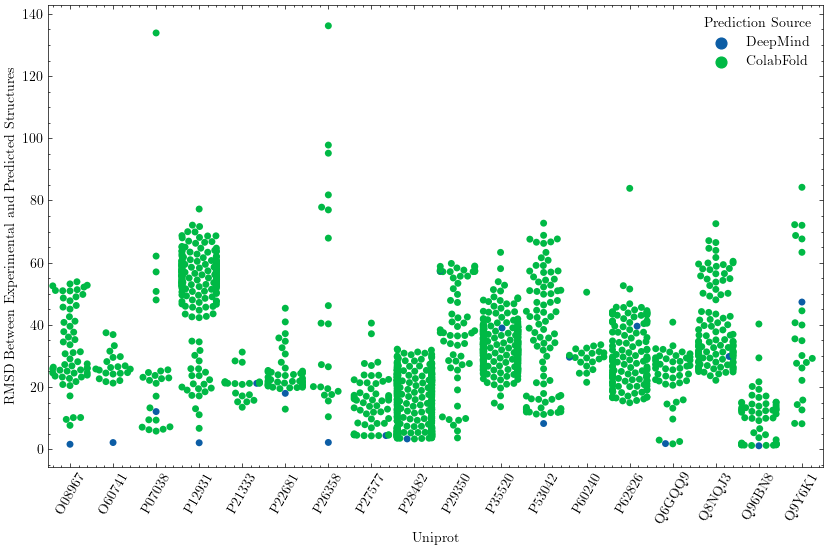

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.swarmplot(x='uniprot', y='2_comp', data=final, hue='source', ax=ax)
plt.xticks(rotation=60)
plt.xlabel('Uniprot')
plt.ylabel('RMSD Between Experimental and Predicted Structures')
plt.legend(title='Prediction Source')
plt.show()